In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

from citipy import citipy



from config import api_key



In [2]:
#Generate the DataFrame of Random Cities
num_cities = 1000
#{'coord': {'lon': , 'lat': }
latitude = np.random.uniform(-90, 90,num_cities)
longitude = np.random.uniform(-180, 180,num_cities)


#Create Data Frame of Latitude and Longitude 
lat_long_df = pd.DataFrame({
    'Latitude' : latitude,
    'Longitude': longitude
})

cities = []
latitude_NS = []
longitude_WE = []
for city in range(0,num_cities):
    near_city = citipy.nearest_city(latitude[city],longitude[city])
    city_name = near_city.city_name 
    cities.append(city_name)
    
    if latitude[city] < 0:
        latitude_NS.append(str(abs(latitude[city])) +'S')
    else:
        latitude_NS.append(str(abs(latitude[city])) + 'N')
    
    if longitude[city] < 0:
        longitude_WE.append(str(abs(longitude[city])) + 'W')
    else:
        longitude_WE.append(str(longitude[city]) + 'E')
        
        
cities_dict = {
    'City': cities,
    'Random Latitude': latitude,
    'Random Longitude': longitude,
    'Latitude_NS': latitude_NS,
    'Longitude_WE': longitude_WE
    
    
}
cities_df = pd.DataFrame(cities_dict)


cities_df.head(20)  


#lat_long_df['Lat Lon '] = lat_long_df['Latitude'] , lat_long_df['Longitude']
#lat_long_df

,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,nikolskoye,47.743284,175.644839,47.74328356355437N,175.64483866495578E
1,taolanaro,-38.617078,52.559093,38.61707778412158S,52.55909254303475E
2,hermanus,-61.822635,2.886010,61.822634563648435S,2.8860103518065046E
3,ahipara,-34.216939,171.844415,34.216939098465126S,171.8444149345097E
4,esperance,-44.098138,127.495067,44.09813844668224S,127.49506748920516E
5,saskylakh,74.724607,110.316566,74.72460655525686N,110.31656582476091E
6,ushuaia,-88.591985,-76.432672,88.59198467213739S,76.43267211711641W
7,khanpur,28.760315,70.861542,28.76031467891289N,70.8615418359812E
8,saskylakh,74.979441,111.780692,74.97944051784285N,111.78069169398526E
9,bluff,-64.241472,167.995234,64.24147173315487S,167.9952337241533E


In [3]:
# Save config information

#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'
cities = cities_df['City']
city = "Cape Town"

# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

query_url = url + 'q=' + city + '&appid=' + api_key + '&units=metric'

#Series that contains every 
cities_url = url + 'q=' + cities_df['City'] + '&appid=' + api_key + '&units=' + units




cities_df




,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,nikolskoye,47.743284,175.644839,47.74328356355437N,175.64483866495578E
1,taolanaro,-38.617078,52.559093,38.61707778412158S,52.55909254303475E
2,hermanus,-61.822635,2.886010,61.822634563648435S,2.8860103518065046E
3,ahipara,-34.216939,171.844415,34.216939098465126S,171.8444149345097E
4,esperance,-44.098138,127.495067,44.09813844668224S,127.49506748920516E
...,...,...,...,...,...
995,olafsvik,62.735245,-30.280561,62.735245036905496N,30.280561118261062W
996,vaini,-54.101783,-174.093242,54.10178260955107S,174.09324214707144W
997,cape town,-78.102723,-14.026748,78.10272324101771S,14.02674756069672W
998,new norfolk,-78.879595,130.376290,78.87959454636027S,130.37629019505687E


In [4]:
# Get weather data
#weather_response = requests.get(query_url) #requests.models.Response
#weather_json = weather_response.json() #dict
#city_coord = weather_json['coord'] #dict
#city_coord

# Series with all the responses
cities_Response = cities_url.apply(requests.get) #pandas.core.series.Series requests.models.Response
#print(cities_Response)


#cities_Response[5].json()


In [5]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind = []
city_name = []

for n in range(0,len(cities_Response)):
    response = cities_Response[n].json()
    if response['cod'] == '404':
        temp.append(None)
        lat.append(None)
        lon.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind.append(None)
        city_name.append(None)
    else:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(response['name'])
        
        

dict = {
    'City' : city_name,
    'Temperature (F)': temp,
    'Latitude': lat,
    'Longitude' : lon,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Sped (mph)': wind
}

cities_df = pd.DataFrame(dict)
cities_no_NA = cities_df.dropna(how = 'all')
plot_df = cities_no_NA.drop_duplicates(subset=['City'], ignore_index=True)

#Data Frame with Valid and Unique Cities
plot_df

,City,Temperature (F),Latitude,Longitude,Humidity,Cloudiness,Wind Sped (mph)
0,Nikolskoye,38.03,59.7035,30.7861,65.0,40.0,11.18
1,Hermanus,60.01,-34.4187,19.2345,80.0,92.0,1.99
2,Ahipara,53.83,-35.1667,173.1667,80.0,23.0,7.54
3,Esperance,64.40,-33.8667,121.9000,59.0,77.0,10.36
4,Saskylakh,22.03,71.9167,114.0833,99.0,57.0,7.31
...,...,...,...,...,...,...,...
439,Ilhabela,73.08,-23.7781,-45.3581,77.0,13.0,5.79
440,Santa Ana,66.42,33.7456,-117.8678,42.0,1.0,4.61
441,Presidencia Roque Sáenz Peña,73.00,-26.7852,-60.4388,52.0,0.0,4.00
442,Olafsvik,43.84,64.8945,-23.7142,65.0,5.0,6.40


In [6]:
#Divide the Data Between Norther and Southern Hemispher
northern = plot_df.loc[plot_df['Latitude']>= 0,:]
southern = plot_df.loc[plot_df['Latitude'] < 0,:]




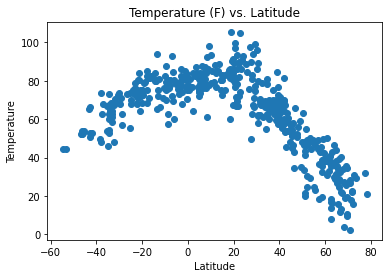

In [7]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Temperature (F)'] )
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature (F) vs. Latitude')
plt.show()



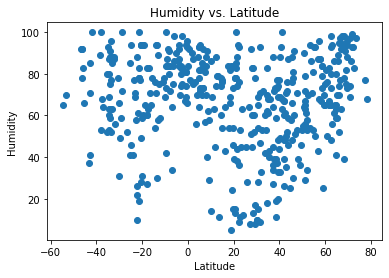

In [8]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Humidity'] )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')
plt.show()



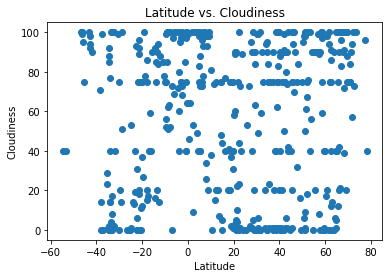

In [9]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Cloudiness'] )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()



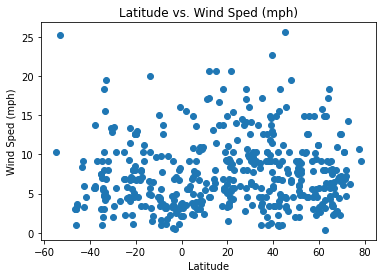

In [10]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Wind Sped (mph)'] )
plt.xlabel('Latitude')
plt.ylabel('Wind Sped (mph)')
plt.title('Latitude vs. Wind Sped (mph)')
plt.show()


In [11]:
#Save to CSV

file_path = '../VacationPy/Cities.csv'
plot_df.to_csv(file_path, index = False)

print(f'The numer of cities is: {num_cities}')
print(f'There are {num_cities-len(plot_df)} cities removed')

The numer of cities is: 1000
There are 556 cities removed
